# Laptop sales Flipkart.com - group number 6

## Group members:
### Noa Bar Nov
### Shir Gonen
### Koral Yehezkia
### Eden Cohen



<div>

![Image](https://github.com/NoaBarNov/Data-Science/blob/main/images/dataset-cover.png?raw=true)

</div>

1. [Wrangling data](#section1)

   1.1 [Fix columns](#section1.1)   
   1.2 [Missing values](#section1.2)  
   1.3 [Transformations](#section1.3)    
   1.4 [Noisy data - outliers](#section1.4)
  
2. [Correlations and Conclusions](#section2)

   2.1 [By model](#section2.1)   
   2.2 [By processor brand](#section2.2)  
   2.3 [By ram type](#section2.3)    
   2.4 [highest on specific columns](#section2.4)

We'll work with a marketing of Laptops dataset, taken from [Flipkart](flipkart.com)

Based on the example [here](https://www.kaggle.com/datasets/kuchhbhi/latest-laptop-price-list)

<div>

![Image](https://raw.githubusercontent.com/NoaBarNov/Data-Science/main/images/flipkart.jpg)

</div>

### Explaination about the data:

| Column      | Description |
|:----------- |:----------- |
| brand     | brand of the computer       |
| model       | model of the computer       |
| processor_brand       | processor brand of the computer      |
| processor_name       | the name of the processor of the computer      |
| processor_gntrn      | the generation of the processor of the computer      |
| ram_gb       | the size of the RAM (Random Access Memory) (in GB)       |
| ram_type       | the type of the RAM (Random Access Memory)       |
| ssd       | solid state drive size (in GB)      |
| hdd      | hard disc drive size (in GB)  |
| os       |  type of operation system     |
| os_bit       |  operation system bits    |
| graphic_card_gb       |  the size of the graphic card (in GB)      |
| weight       |  the computer weight    |
| display_size       |  the size of the screen (in Inch)    |
| warranty       |  number of warranty years      |
| Touchscreen      |  if the computer has a touch screen     |
| msoffice       |  if there are Office applications on the computer      |
| latest_price       |  the price after the discount  (Indian Rupee)    |
| old_price       |  the price before the discount (Indian Rupee)    |
| discount       | the discount (in percentage(      |
| star_rating        |  the mean of the star rating of the computer      |
| rating       |  number of ratings (star ratings) of the computer    |
| reviews       |  number of reviews of the computer    |




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/NoaBarNov/Data-Science/main/Cleaned_Laptop_data1.csv'
data_comp = pd.read_csv(url)

In [3]:
data = data_comp.copy()

In [4]:
data.shape

(896, 23)

In [5]:
data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


---
<a id='section1'></a>
### 1. Wrangling data

<a id='section1.1'></a>
#### 1.1 Fix columns

In [6]:
data.dtypes

brand               object
model               object
processor_brand     object
processor_name      object
processor_gnrtn     object
ram_gb              object
ram_type            object
ssd                 object
hdd                 object
os                  object
os_bit              object
graphic_card_gb      int64
weight              object
display_size        object
warranty             int64
Touchscreen         object
msoffice            object
latest_price         int64
old_price            int64
discount             int64
star_rating        float64
ratings              int64
reviews              int64
dtype: object

All of the columns seems to be OK

<a id='section1.2'></a>
#### 1.2 Missing values

In [7]:
data.isnull().sum().sort_values(ascending=False)

brand              0
weight             0
ratings            0
star_rating        0
discount           0
old_price          0
latest_price       0
msoffice           0
Touchscreen        0
warranty           0
display_size       0
graphic_card_gb    0
model              0
os_bit             0
os                 0
hdd                0
ssd                0
ram_type           0
ram_gb             0
processor_gnrtn    0
processor_name     0
processor_brand    0
reviews            0
dtype: int64

Replacing missing to NaN's for conveniency

In [8]:
data = data.replace('Missing' , np.nan)

In [9]:
data.isnull().sum().sort_values(ascending=False)

display_size       332
processor_gnrtn    239
model               95
brand                0
ratings              0
star_rating          0
discount             0
old_price            0
latest_price         0
msoffice             0
Touchscreen          0
warranty             0
graphic_card_gb      0
weight               0
os_bit               0
os                   0
hdd                  0
ssd                  0
ram_type             0
ram_gb               0
processor_name       0
processor_brand      0
reviews              0
dtype: int64

##### Fixing processor generator column

In [10]:
data['processor_gnrtn'].isnull().sum()

239

<AxesSubplot:xlabel='processor_gnrtn', ylabel='Percent'>

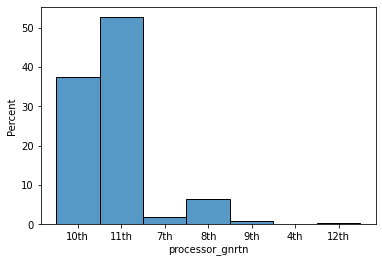

In [11]:
sns.histplot(data = data, x='processor_gnrtn', stat = 'percent')

We have dicided to ignore the missing values because there are 26.26% missing valuse

##### Fixing model column

In [12]:
data['model'].isnull().sum()

95

In [13]:
data.model.unique()

array(['A6-9225', 'Ideapad', 'PURA', 'APU', 'Athlon', 'Aspire',
       'ExpertBook', nan, 'v15', 'VivoBook', 'EeeBook', 'Nitro', 'Cosmos',
       'x360', 'IdeaPad', 'Celeron', '15q', '250-G6', 'Vostro', '15',
       'Pavilion', 'Book', 'Inspiron', 'INBook', 'ThinkPad', 'Chromebook',
       'Commercial', '14s', 'INSPIRON', 'V15', '15s', '3000', 'Notebook',
       'Vivo', 'DA', 'Insprion', 'Travelmate', '14a', 'Predator', 'Spin',
       'Swift', 'ROG', 'XPS', 'Omen', 'Surface', 't.book', 'Yoga', 'Gram',
       'Spectre', 'VivoBook14', 'TUF', 'Book(Slim)', 'Pro', 'PureBook',
       'ASUS', 'Katana', 'GF63', 'Thinkbook', 'Intel', 'G15', 'ZenBook',
       'Legion', 'Modern', 'ThinkBook', 'Prestige', 'Zenbook', 'MacBook',
       'Sword', 'Envy', 'SE', 'ConceptD', 'HP', 'DELL', 'X390', 'Thinpad',
       'Inpiron', 'GAMING', 'GS', '430', 'Liber', 'F17', 'B50-70', 'GE76',
       'GP65', 'GP76', '250', '3511', 'G3', 'GS66', 'X1', 'GF65',
       'Stealth', 'Zephyrus', 'Summit', 'OMEN', 'Pulse', '

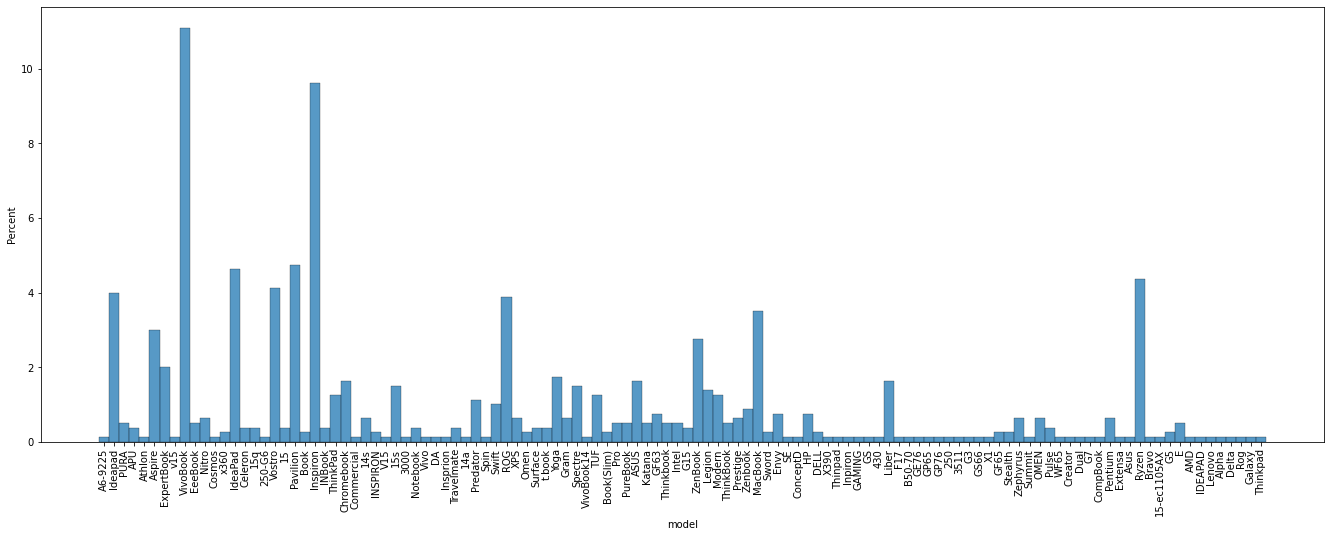

In [14]:
sns.histplot(data = data, x= 'model', stat = 'percent')
plt.xlabel("model")
plt.xticks(rotation=90)
plt.gcf().set_size_inches(23, 8)
plt.show()

We have dicided to ignore the missing values because there are too many selecting options and we wouldn't like to delete 10% of our data

##### fixing display size coloumn

In [15]:
data['display_size'].isnull().sum()

332

<AxesSubplot:xlabel='display_size', ylabel='Percent'>

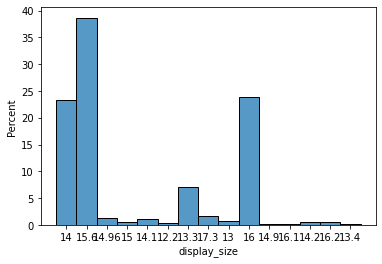

In [16]:
sns.histplot(data = data, x= 'display_size', stat = 'percent')

We have dicided to ignore the missing values because there are 33.33% missing valuse

<a id='section1.3'></a>
#### 1.3 Transformations

##### Fixing ram_gb column

In [17]:
data.ram_gb.unique()

array(['4 GB GB', '8 GB GB', '32 GB GB', '16 GB GB'], dtype=object)

In [18]:
data['ram_gb'] =data['ram_gb'].replace({'4 GB GB':4,'8 GB GB':8,'16 GB GB':16,'32 GB GB':32})
data.ram_gb.unique()

array([ 4,  8, 32, 16], dtype=int64)

##### Fixing processor_gnrtn column

In [19]:
data.processor_gnrtn.unique()

array(['10th', nan, '11th', '7th', '8th', '9th', '4th', '12th'],
      dtype=object)

In [20]:
data['processor_gnrtn'] =data['processor_gnrtn'].replace({'10th':10,'11th':11,'7th':7,'8th':8,'8th':8,'9th':9,'12th':12,'4th':4})
data.processor_gnrtn.unique()

array([10., nan, 11.,  7.,  8.,  9.,  4., 12.])

##### Fixing ssd column

In [21]:
data.ssd.unique()

array(['0 GB', '128 GB', '256 GB', '32 GB', '512 GB', '1024 GB',
       '2048 GB', '3072 GB'], dtype=object)

In [22]:
data['ssd'] =data['ssd'].replace({'0 GB':0,'128 GB':128,'256 GB':256,'32 GB':32,'512 GB':512,'1024 GB':1024,'2048 GB':2048,'3072 GB':3072})
data.ssd.unique()

array([   0,  128,  256,   32,  512, 1024, 2048, 3072], dtype=int64)

##### Fixing hdd column

In [23]:
data.hdd.unique()

array(['1024 GB', '512 GB', '0 GB', '2048 GB'], dtype=object)

In [24]:
data['hdd'] =data['hdd'].replace({'0 GB':0,'512 GB':512,'1024 GB':1024,'2048 GB':2048})
data.hdd.unique()

array([1024,  512,    0, 2048], dtype=int64)

##### Fixing os_bit column

In [25]:
data.os_bit.unique()

array(['64-bit', '32-bit'], dtype=object)

In [26]:
data['os_bit'] =data['os_bit'].replace({'64-bit':64,'32-bit':32})
data.os_bit.unique()

array([64, 32], dtype=int64)

##### Fixing display_size column

In [27]:
data.display_size.unique()

array([nan, '14', '15.6', '14.96', '15', '14.1', '12.2', '13.3', '17.3',
       '13', '16', '14.9', '16.1', '14.2', '16.2', '13.4'], dtype=object)

In [28]:
data['display_size'] = data['display_size'].astype(float)

In [29]:
data.display_size.info()

<class 'pandas.core.series.Series'>
RangeIndex: 896 entries, 0 to 895
Series name: display_size
Non-Null Count  Dtype  
--------------  -----  
564 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


##### Fixing Touchscreen column

In [30]:
data['Touchscreen'] = data['Touchscreen'].replace({'Yes':1,'No':0})

In [31]:
data.Touchscreen.unique()

array([0, 1], dtype=int64)

##### Fixing msoffice column

In [32]:
data['msoffice'] = data['msoffice'].replace({'Yes':1,'No':0})

In [33]:
data.msoffice.unique()

array([0, 1], dtype=int64)

##### Fixing weight column

In [34]:
data.weight.unique()

array(['ThinNlight', 'Casual', 'Gaming'], dtype=object)

In [35]:
data['weight'] = data['weight'].replace({'ThinNlight':1,'Casual':2,'Gaming':3})

In [36]:
data.weight.unique()

array([1, 2, 3], dtype=int64)

Lets look at our data after the changes:

In [37]:
data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10.0,4,DDR4,0,1024,Windows,...,NaN,0,0,0,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10.0,4,DDR4,0,512,Windows,...,NaN,0,0,0,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10.0,4,DDR4,128,0,Windows,...,NaN,0,0,0,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10.0,4,DDR4,128,0,Windows,...,NaN,0,0,0,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10.0,4,DDR4,256,0,Windows,...,NaN,0,0,0,24990,33490,25,3.7,1657,234


<a id='section1.4'></a>
#### 1.4 Noisy data - outliers

We choose only the numeric data because we want to see it in boxplot

Select only numeric columns:

In [38]:
data.dtypes

brand               object
model               object
processor_brand     object
processor_name      object
processor_gnrtn    float64
ram_gb               int64
ram_type            object
ssd                  int64
hdd                  int64
os                  object
os_bit               int64
graphic_card_gb      int64
weight               int64
display_size       float64
warranty             int64
Touchscreen          int64
msoffice             int64
latest_price         int64
old_price            int64
discount             int64
star_rating        float64
ratings              int64
reviews              int64
dtype: object

In [39]:
numeric_features = ['processor_gnrtn','ram_gb','ssd','hdd','os_bit','weight','display_size','Touchscreen','msoffice','warranty','latest_price','old_price','discount','star_rating','ratings','reviews']

creating melted data frame for boxplots

In [40]:
melted_by_brand = pd.melt(data, id_vars = 'brand', value_vars = numeric_features)
melted_by_brand

,brand,variable,value
0,Lenovo,processor_gnrtn,10.0
1,Lenovo,processor_gnrtn,10.0
2,Avita,processor_gnrtn,10.0
3,Avita,processor_gnrtn,10.0
4,Avita,processor_gnrtn,10.0
...,...,...,...
14331,ASUS,reviews,0.0
14332,ASUS,reviews,0.0
14333,ASUS,reviews,0.0
14334,SAMSUNG,reviews,0.0


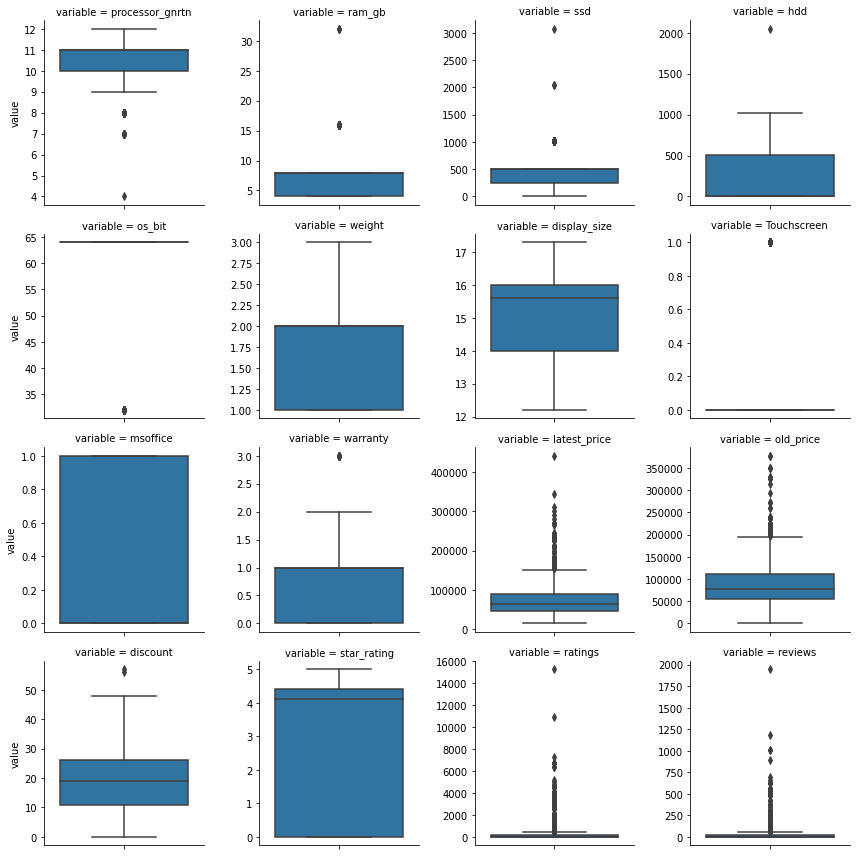

In [41]:
g = sns.FacetGrid(data =melted_by_brand, col='variable',  col_wrap=4,sharey = False)
g.map_dataframe(sns.boxplot, y = 'value')
plt.show()

Lets focuse on the ratings, reviews and star ratings columns because the large amount of zeros (as it seems...)

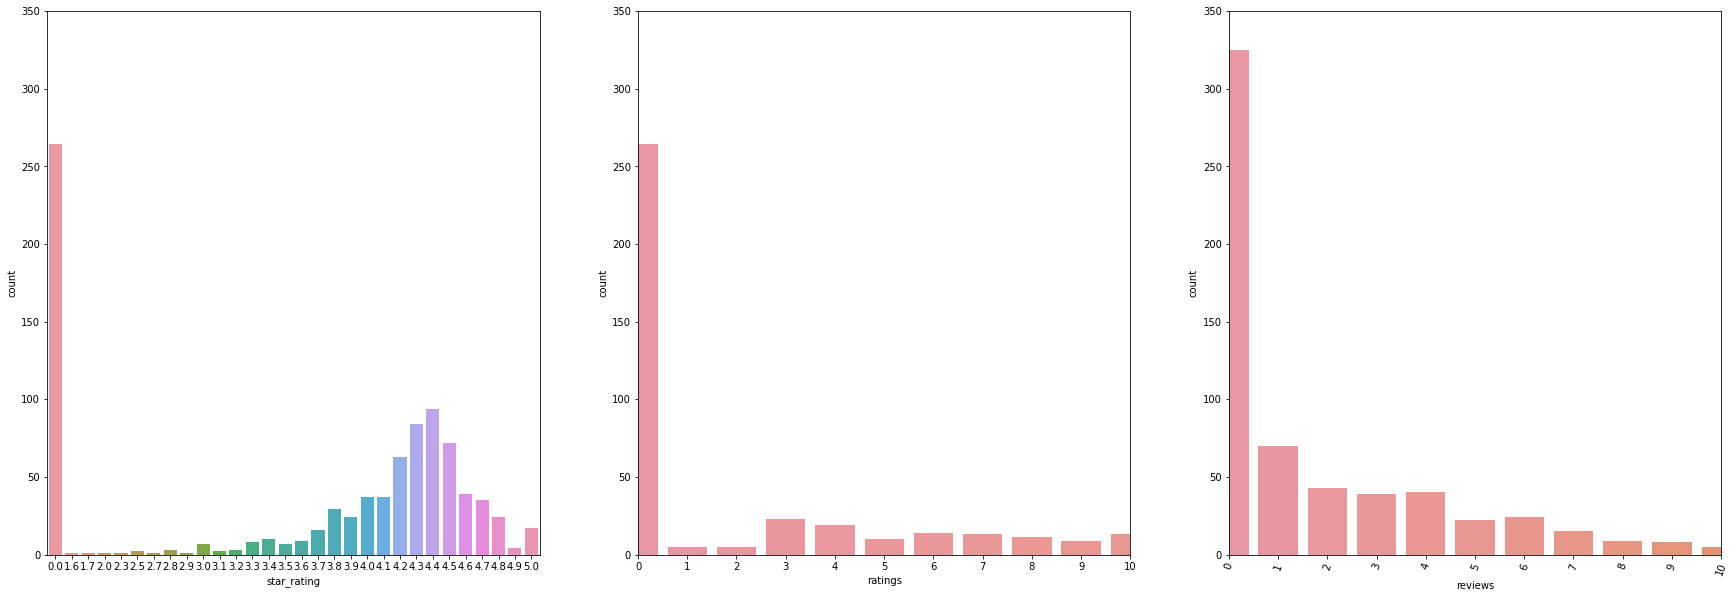

In [42]:
fig, ax = plt.subplots(1,3,figsize=(30, 10))
ax0 = sns.countplot(data = data, x = 'star_rating', ax = ax[0])
ax0.set(ylim=(0,350))
ax1 = sns.countplot(data = data, x = 'ratings', ax = ax[1])
ax1.set(xlim=(0,10))
ax1.set(ylim=(0,350))
ax2 = sns.countplot(data = data, x = 'reviews', ax = ax[2])
ax2.set(xlim=(0,10))
ax2.set(ylim=(0,350))
plt.xticks(rotation = 70)
plt.show()

We will check the number of row that contains zero at columns star rating and ratings (because we see that star ratings has more than 250 rows that includs zero)

In [43]:
data[(data.ratings == 0) & (data.star_rating == 0)]

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
8,HP,Athlon,AMD,Athlon Dual,10.0,32,DDR4,32,0,Windows,...,14.0,0,0,0,26899,27668,2,0.0,0,0
13,ASUS,ExpertBook,Intel,Core i5,10.0,8,DDR4,512,0,Windows,...,NaN,0,0,0,69990,0,0,0.0,0,0
14,ASUS,VivoBook,Intel,Celeron Dual,NaN,4,DDR4,0,512,Windows,...,NaN,0,0,0,26990,28990,6,0.0,0,0
15,ASUS,EeeBook,Intel,Celeron Dual,NaN,4,DDR4,0,512,Windows,...,NaN,0,0,0,22990,27990,17,0.0,0,0
17,ASUS,ExpertBook,Intel,Core i5,10.0,8,DDR4,0,1024,Windows,...,14.0,0,0,0,58799,77990,24,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,ASUS,ROG,AMD,Ryzen 9,NaN,4,DDR4,1024,0,Windows,...,16.0,1,0,0,135990,172990,21,0.0,0,0
891,ASUS,ROG,AMD,Ryzen 9,NaN,4,DDR4,1024,0,Windows,...,16.0,1,0,0,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,NaN,4,DDR4,1024,0,Windows,...,NaN,1,0,0,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,NaN,4,DDR4,1024,0,Windows,...,16.0,1,0,0,142990,0,0,0.0,0,0


star ratings and ratings containning 264 shared rows of zero stars due zero ratings, it means that people didn't give 0 stars to a product, the costumers didnt rate the product at all.

We will notice that when we want to to correlation with those columns. 

---
<a id='section2'></a>
### 2. Correlations and Conclusions

Let's divide the information into numerical and categorical variables in order to see which method we will choose (pearson/kendall/spearman)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            801 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  657 non-null    float64
 5   ram_gb           896 non-null    int64  
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    int64  
 8   hdd              896 non-null    int64  
 9   os               896 non-null    object 
 10  os_bit           896 non-null    int64  
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    int64  
 13  display_size     564 non-null    float64
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    int64  
 16  msoffice         896 non-null    int64  
 17  latest_price    

In [45]:
categorial_features = ['brand', 'model', 'processor_brand','processor_name','ram_type','os']

In [46]:
numeric_features 

['processor_gnrtn',
 'ram_gb',
 'ssd',
 'hdd',
 'os_bit',
 'weight',
 'display_size',
 'Touchscreen',
 'msoffice',
 'warranty',
 'latest_price',
 'old_price',
 'discount',
 'star_rating',
 'ratings',
 'reviews']

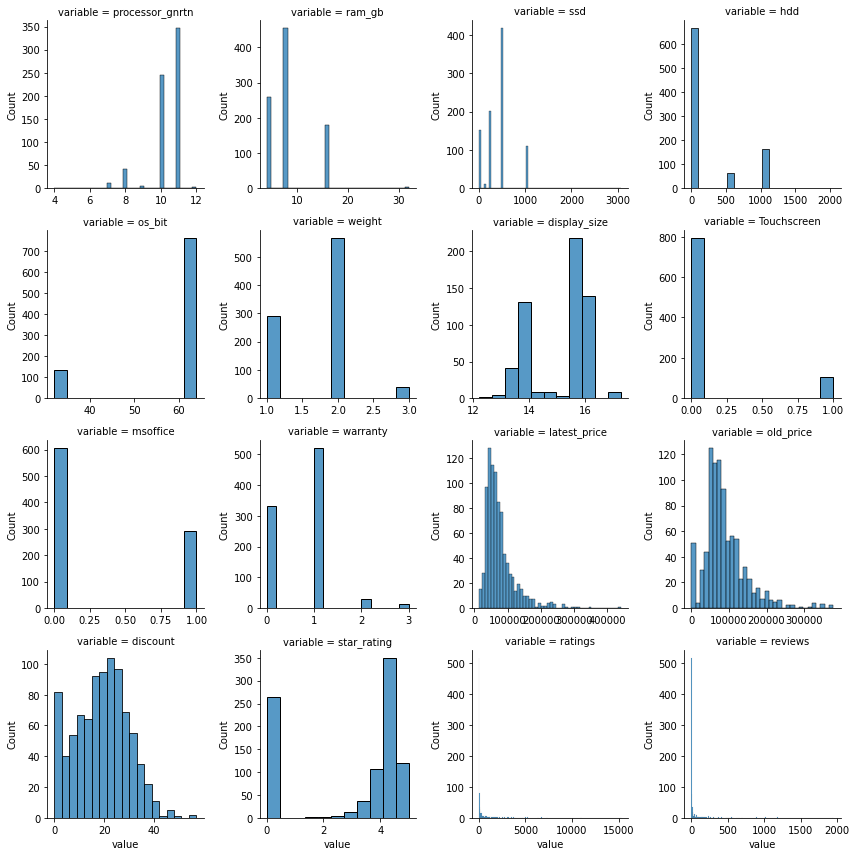

In [47]:
g = sns.FacetGrid(data =melted_by_brand , col="variable", col_wrap=4, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x = "value")
plt.show()

We will choose the Kendall method

<a id='section2.1'></a>
#### 2.1 By model

In [48]:
data_groupby_model = data.groupby('model')[numeric_features].mean()
data_groupby_model

,processor_gnrtn,ram_gb,ssd,hdd,os_bit,weight,display_size,Touchscreen,msoffice,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
model,,,,,,,,,,,,,,,,
14a,NaN,4.000000,0.000000,512.000000,64.000000,2.000000,NaN,0.000000,0.000000,0.000000,26470.000000,31532.000000,16.000000,3.600000,232.000000,23.000000
14s,10.5,5.600000,358.400000,204.800000,64.000000,1.000000,NaN,0.000000,0.800000,0.800000,49092.000000,57970.800000,13.800000,4.200000,1732.600000,186.000000
15,10.0,10.666667,298.666667,341.333333,42.666667,1.333333,15.6,0.000000,0.000000,1.000000,66307.000000,35999.333333,16.000000,2.866667,708.666667,101.333333
15-ec1105AX,NaN,8.000000,512.000000,0.000000,64.000000,2.000000,15.6,0.000000,0.000000,1.000000,58990.000000,70172.000000,15.000000,4.500000,1049.000000,134.000000
15q,7.5,5.333333,0.000000,1024.000000,64.000000,2.000000,15.6,0.000000,0.000000,0.666667,37554.000000,16730.000000,2.000000,4.133333,1242.000000,136.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zenbook,11.0,9.142857,731.428571,0.000000,59.428571,1.857143,15.0,0.714286,0.428571,0.428571,98275.714286,127847.142857,22.571429,1.271429,12.285714,2.285714
Zephyrus,11.0,11.200000,1433.600000,0.000000,44.800000,2.000000,16.0,0.000000,0.000000,1.000000,205443.800000,102994.000000,13.600000,1.860000,1.600000,0.200000
t.book,7.0,5.333333,128.000000,0.000000,64.000000,2.000000,12.2,1.000000,0.000000,0.000000,49656.666667,52662.666667,5.333333,3.633333,27.666667,6.333333


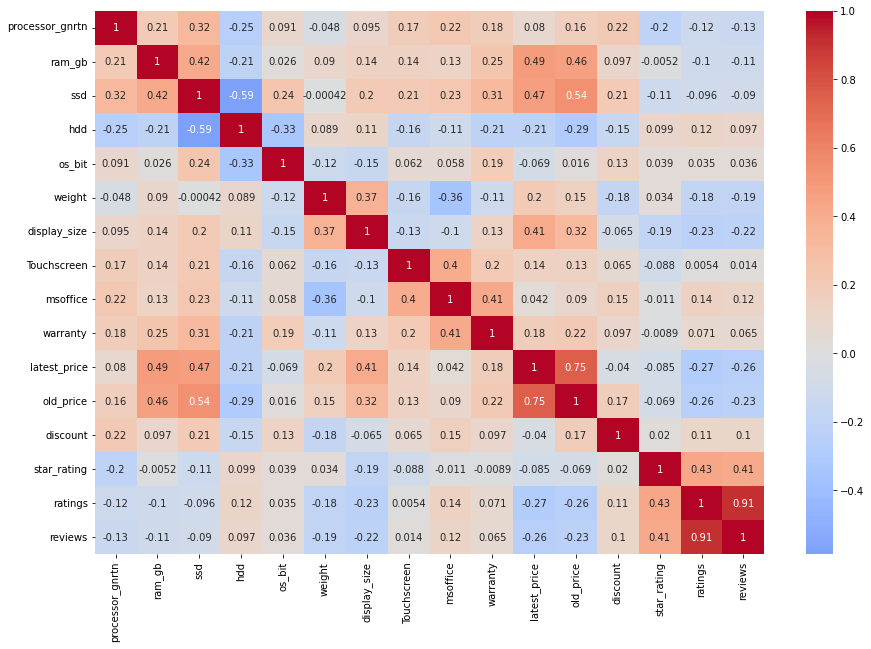

In [49]:
corrs = data_groupby_model.corr(method = 'kendall')
plt.figure(figsize=(15,10))  
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

<AxesSubplot:xlabel='hdd', ylabel='ssd'>

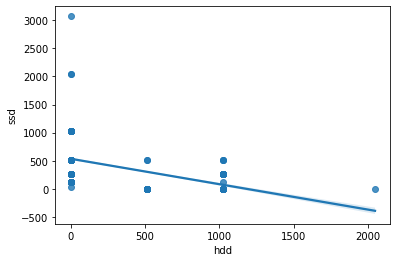

In [50]:
sns.regplot(x='hdd', y='ssd', data=data) #-0.59

[(0.0, 100.0)]

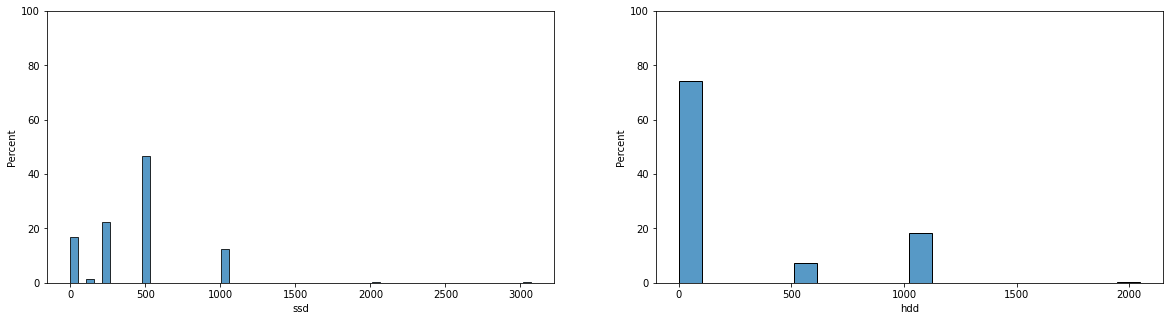

In [51]:
fig, ax = plt.subplots(1,2,figsize=(20, 5))
ax0 = sns.histplot(data = data, x='ssd', stat = 'percent',ax = ax[0])
ax0.set(ylim=(0,100))
ax1 = sns.histplot(data = data, x='hdd', stat = 'percent',ax = ax[1])
ax1.set(ylim=(0,100))

We can see that there is a large group of laptops that doesn't have a hard disk (74%)

In [52]:
len(data[data.hdd == 0])/len(data)*100 

74.33035714285714

Also, we can see that there is a group of laptops that doesn't have a hard disk and solid state drive (16%)

In [53]:
len(data[(data.ssd == 0) & (data.hdd>0)])/len(data)*100  #151/896*100

16.852678571428573

Moreover, we can see that there is a group of laptops that have hard drive and solid state drive (9%)

In [54]:
hdd_ssd = data[(data.ssd>0) & (data.hdd>0)]
len(hdd_ssd)/len(data)*100 # 79/896*100

8.816964285714286

Computers that have hard disk (26%)

In [55]:
len(data[data.hdd > 0])/len(data)*100 

25.669642857142854

Also, we can see that there is a group of laptops that doesn't have a solid state and have a hard disk (17%)

In [56]:
len(data[(data.ssd == 0) & (data.hdd>0)])/len(data)*100  

16.852678571428573

And for the last time, computers that have both of the drives (9%)

In [57]:
hdd_ssd = data[(data.ssd >0) & (data.hdd>0)]
len(hdd_ssd)/len(data)*100 

8.816964285714286

---

>#### Observation 1 :
>
>Most computers contain a solid drive and this is due its higher performances.
>
>Computers which has both - solid drive and hard drive (which is 9% of the computers) , will be purchased by people who probably download large files, and may use large programmes.
>
>In conclusion, our assumption is that most of the people will probably buy computers that contain solid drive because we can see that most of the manufactured computers are having only solid drive. that may also, indiacte that most of the people have the need to computers that can run large programmes on computers that can run large files. 
---

<div>

![Image](https://github.com/NoaBarNov/Data-Science/blob/main/images/%D7%94%D7%A9%D7%95%D7%95%D7%90%D7%94%20%D7%91%D7%99%D7%9F%20SSD%20HDD.png?raw=true)

</div>

source from [mylist.co.il](https://www.mylist.co.il/%D7%9E%D7%93%D7%A8%D7%99%D7%9B%D7%99%D7%9D/%D7%9B%D7%95%D7%A0%D7%9F-ssd-%D7%90%D7%95-%D7%9B%D7%95%D7%A0%D7%9F-hdd/)

<a id='section2.2'></a>
#### 2.2 By processor brand

In [58]:
data_groupby_processor_brand = data.groupby('processor_brand')[numeric_features].mean()
data_groupby_processor_brand

,processor_gnrtn,ram_gb,ssd,hdd,os_bit,weight,display_size,Touchscreen,msoffice,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
processor_brand,,,,,,,,,,,,,,,,
AMD,10.000000,7.00000,527.538462,157.538462,60.153846,1.75000,15.358116,0.110577,0.360577,0.730769,72934.480769,90099.086538,20.365385,2.869231,337.062500,44.254808
Intel,10.355049,8.89697,400.096970,255.224242,58.860606,1.69697,15.114677,0.121212,0.325758,0.672727,75060.671212,85250.983333,18.401515,2.951970,320.690909,41.248485
M1,10.000000,12.50000,565.333333,0.000000,64.000000,2.00000,13.887500,0.000000,0.000000,1.000000,148156.666667,159900.000000,7.208333,4.750000,1397.875000,136.041667
MediaTek,10.000000,4.00000,0.000000,512.000000,32.000000,2.00000,NaN,0.000000,0.000000,0.000000,22823.333333,25451.000000,9.666667,3.800000,4623.000000,553.000000
Qualcomm,NaN,4.00000,0.000000,512.000000,32.000000,2.00000,NaN,0.000000,0.000000,0.000000,38990.000000,47990.000000,18.000000,0.000000,0.000000,0.000000


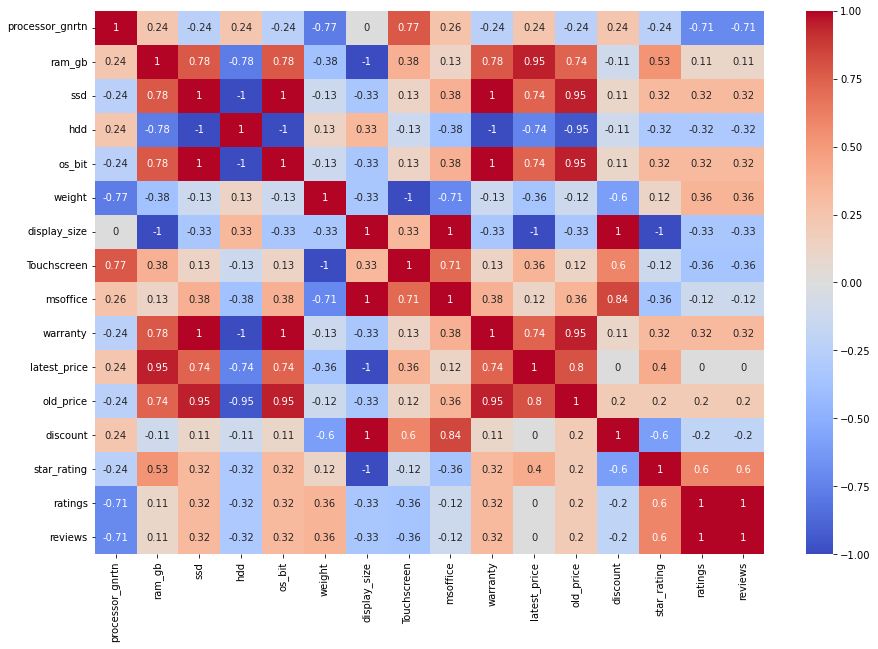

In [59]:
corrs = data_groupby_processor_brand.corr(method = 'kendall')
plt.figure(figsize=(15,10)) 
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

<AxesSubplot:xlabel='ram_gb', ylabel='latest_price'>

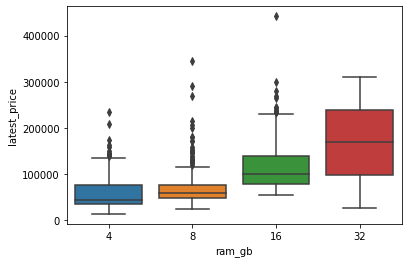

In [60]:
sns.boxplot(data=data ,x='ram_gb' , y='latest_price') #0.95

We want to observe the processor brand 

<AxesSubplot:xlabel='ram_gb', ylabel='latest_price'>

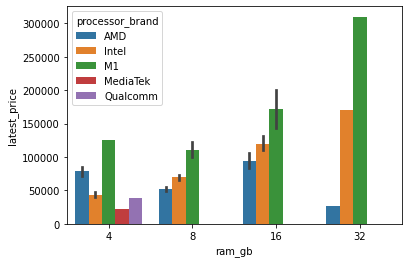

In [61]:
sns.barplot(data=data ,x='ram_gb' , y='latest_price',hue='processor_brand')#0.95

From the plot we can see the the processor M1 is more expensive than the others

so we will check its ratings, operation system bit, ram gb

Text(0, 0.5, 'warranty in percentage')

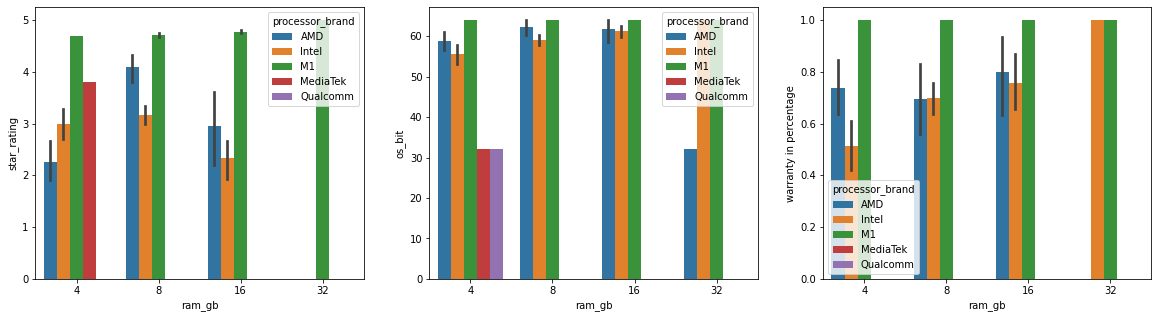

In [62]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.barplot(data=data ,x='ram_gb' , y='star_rating',hue='processor_brand', ax = ax[0])#0.53
sns.barplot(data=data ,x='ram_gb' , y='os_bit',hue='processor_brand',ax = ax[1])#0.78
sns.barplot(data=data ,x='ram_gb' , y='warranty', hue ='processor_brand', ax = ax[2])#0.78
plt.ylabel('warranty in percentage')

we realize that M1 got the highest rating (4.75).

Additionally it have a operation system which runs large amount of information.

And we will check the number of warranty years:

In [63]:
data_M1 = data[data.processor_brand == 'M1']

In [64]:
data_M1['warranty']

655    1
656    1
657    1
658    1
659    1
660    1
661    1
662    1
663    1
664    1
665    1
666    1
667    1
668    1
669    1
670    1
671    1
672    1
673    1
674    1
675    1
676    1
677    1
678    1
Name: warranty, dtype: int64

We can see that the M1 has a warrany of 1 year

---

>#### Observation 2 :
>
>From the graphs we can see that processor M1 is the processor that is most recommended for purchase in all aspects:
> 1) it has the highest ratings.
> 2) it has the best operating system bit (Runs a larger amount of information).
> 3) it has one year warranty compared to the other models.
> 
> Therefore we will recommand the sales department of Flipart.com to offer the costumers to buy computers that contains M1 (it is also will increase the company revenue).

---

<a id='section2.3'></a>
#### 2.3 By ram type

In [65]:
data_groupby_ram_type = data.groupby('ram_type')[numeric_features].mean()
data_groupby_ram_type

,processor_gnrtn,ram_gb,ssd,hdd,os_bit,weight,display_size,Touchscreen,msoffice,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
ram_type,,,,,,,,,,,,,,,,
DDR3,7.272727,8.333333,256.000000,128.000000,64.000000,1.583333,14.100000,0.416667,0.250000,0.500000,77939.500000,74231.500000,9.916667,3.783333,135.500000,23.333333
DDR4,10.389587,8.436842,426.989474,237.136842,60.126316,1.709211,15.129165,0.085526,0.343421,0.731579,70955.752632,82252.169737,18.650000,3.032237,380.655263,47.451316
DDR5,10.666667,8.000000,704.000000,64.000000,48.000000,2.000000,16.000000,0.000000,0.000000,0.250000,153490.000000,188241.125000,19.875000,1.062500,1372.000000,148.500000
LPDDR3,9.571429,12.571429,768.000000,0.000000,64.000000,1.714286,15.662500,0.071429,0.285714,0.500000,138870.857143,117761.214286,13.928571,2.278571,9.785714,0.857143
LPDDR4,10.080000,7.111111,42.666667,497.777778,35.555556,1.916667,15.355556,0.000000,0.027778,0.111111,108063.777778,119917.777778,16.083333,3.394444,389.666667,53.833333
LPDDR4X,10.702128,9.636364,634.181818,46.545455,60.606061,1.712121,14.927083,0.484848,0.318182,0.681818,97720.924242,122638.621212,20.833333,2.393939,198.757576,28.363636


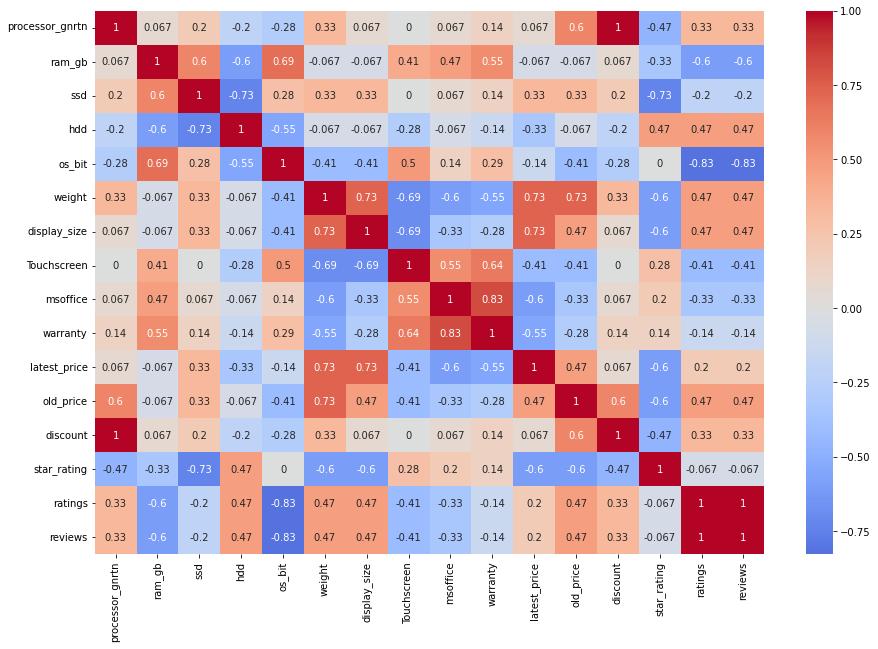

In [66]:
corrs = data_groupby_ram_type.corr(method = 'kendall')
plt.figure(figsize=(15,10)) 
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

First, we looked at the correlation between display size to latest price.

In the second plot we will exemine the division of touch screens and regular screens (from curiosity).

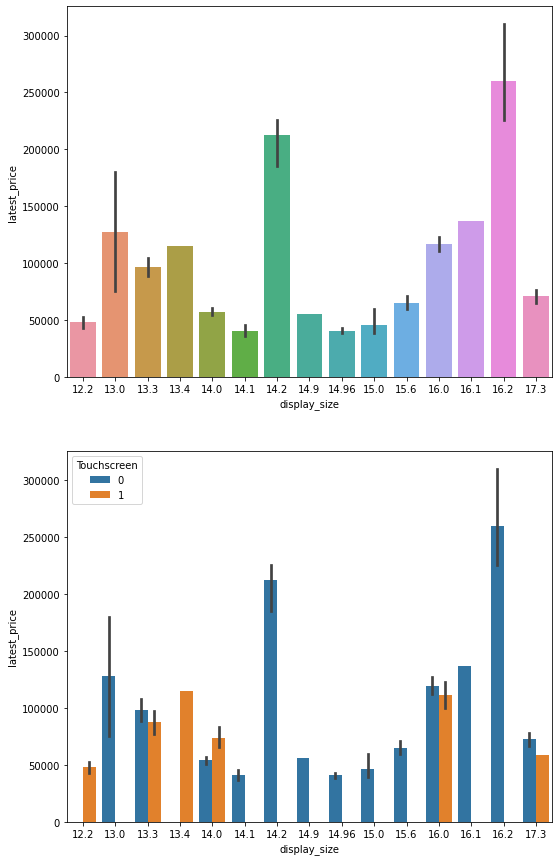

In [67]:
fig, ax = plt.subplots(2,2, figsize = (20,15))
plt.subplots_adjust(wspace = 0.3)
sns.barplot( x = 'display_size', y = 'latest_price', data=data, ax = ax[0,0]) #0.73
sns.barplot( x = 'display_size', y = 'latest_price',hue = 'Touchscreen', data=data, ax = ax[1,0])
fig.delaxes(ax[1,1]) #deleting the remain column
fig.delaxes(ax[0,1])
plt.show()

In light of the exhibited graphs, now we will check the prices division of the computers with touchscreen and without.

At first, we will check the average price of computer in the market.

In [68]:
data['latest_price'].mean()

76309.86049107143

Afterward, we will check the average price of computers without touch screen.

In [69]:
data_no_ts = data[(data.Touchscreen == 0) & (data.latest_price >= 0)]
data_no_ts.latest_price.mean()

73424.94073139975

In the end, we will check the average price of computers with touch screen.

In [70]:
data_w_ts = data[(data.Touchscreen == 1) & (data.latest_price >= 0)]
data_w_ts.latest_price.mean()

98520.94174757281

In [71]:
color = ['green', 'grey', 'yellow', 'green',  'yellow', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'yellow', 'grey', 'grey', 'yellow']

Legend of colors:

green - 100% touch screen

yellow - 20% touch screen

grey - regular screen

We will check the percent of the computers with touch screens according to thier display size. 

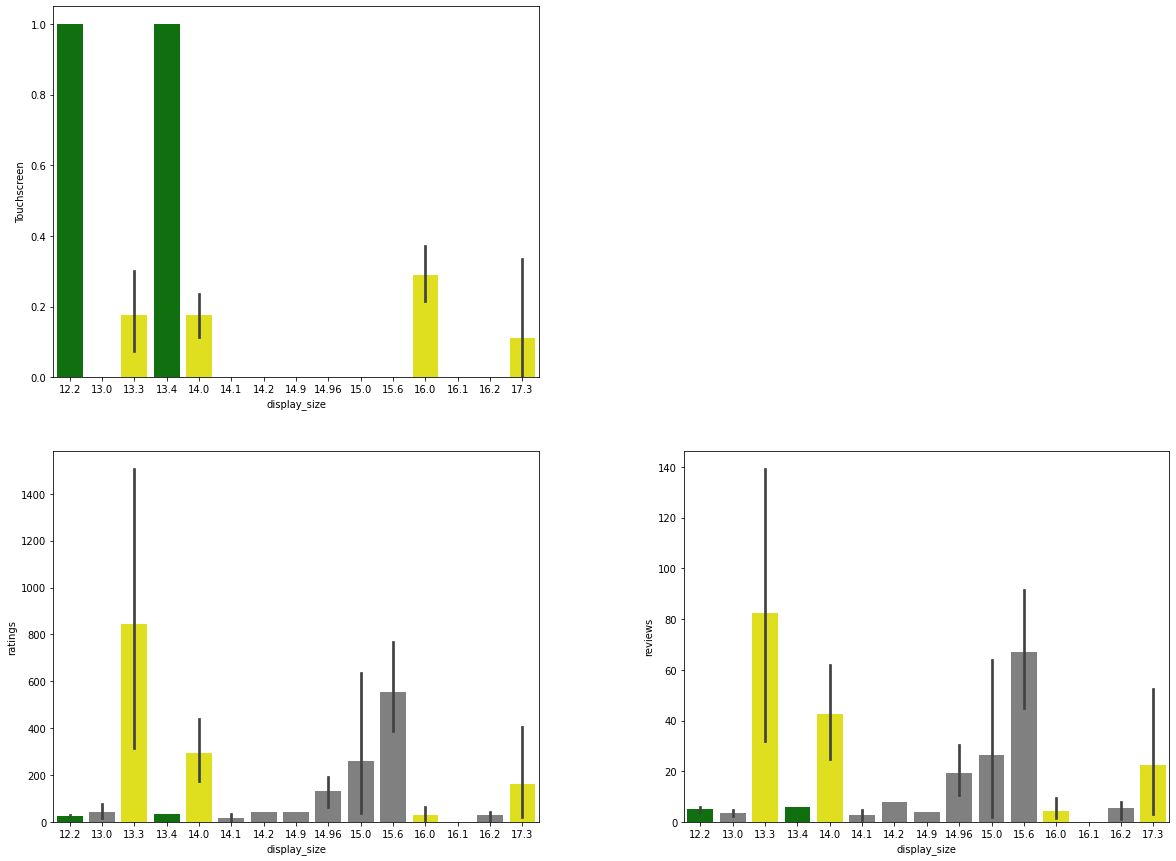

In [72]:
fig, ax = plt.subplots(2,2, figsize = (20,15))
plt.subplots_adjust(wspace = 0.3)
sns.barplot( x = 'display_size', y = 'Touchscreen', data=data, ax = ax[0,0], palette = color)
sns.barplot( x = 'display_size', y = 'ratings', data=data, ax = ax[1,0], palette = color)
sns.barplot( x = 'display_size', y = 'reviews', data=data, ax = ax[1,1], palette = color)
fig.delaxes(ax[0,1]) #deleting the remain column
plt.show()

From the plots we can see that the number of comments (ratings and reviews) are low compared to all of the other computers. (12.2, 13.4)

In [73]:
data['Touchscreen'].mean()

0.11495535714285714

---

>#### Observation 3 :
>
>Like we thought, we can see that the average price of computers with touch screen is much bigger (26%) than the average price of computers without touch screen and therefore we will suggest to the public of the buyers to dont buy computers with touch screen if they dont find a proper use to them.
>
>From the the exhibited graphs, we can see that computers with 12.2 inches and 13.4 inches, are available only with touch screen, both of them have low number of comments. That finding can lead us to the fact that less people are buying computers with touch screen or less satisfied with them(like we suspect).
>
>It can be seen that in the present time there are 11% of computers that have touch screens. Therefore, our recommendation is to remain to import touch computers in low quantity.


---

![Image](https://github.com/NoaBarNov/Data-Science/blob/main/images/displaysize.png?raw=true)


<a id='section2.4'></a>
#### 2.4 Focusing on specific columns

As we said before we will check the data without the zero's in the ratings and star ratings

In [74]:
data_no_zero_ratings = data[(data.ratings != 0) & (data.star_rating != 0)].copy()
data_no_zero_ratings

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10.0,4,DDR4,0,1024,Windows,...,NaN,0,0,0,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10.0,4,DDR4,0,512,Windows,...,NaN,0,0,0,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10.0,4,DDR4,128,0,Windows,...,NaN,0,0,0,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10.0,4,DDR4,128,0,Windows,...,NaN,0,0,0,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10.0,4,DDR4,256,0,Windows,...,NaN,0,0,0,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,ASUS,ROG,AMD,Ryzen 9,NaN,4,LPDDR4X,1024,0,Windows,...,16.0,1,1,1,124990,175990,28,5.0,3,0
881,ASUS,ROG,AMD,Ryzen 9,NaN,4,LPDDR4X,1024,0,Windows,...,NaN,1,1,1,142990,201990,29,4.0,4,1
883,ASUS,ROG,AMD,Ryzen 9,NaN,4,LPDDR4X,1024,0,Windows,...,NaN,1,1,1,124990,194990,35,4.2,44,12
884,ASUS,ROG,AMD,Ryzen 9,NaN,4,DDR4,1024,0,Windows,...,16.0,0,0,0,141990,189990,25,4.2,61,13


Lets return to the graphs that we showed before just with the new data (without the zeros)

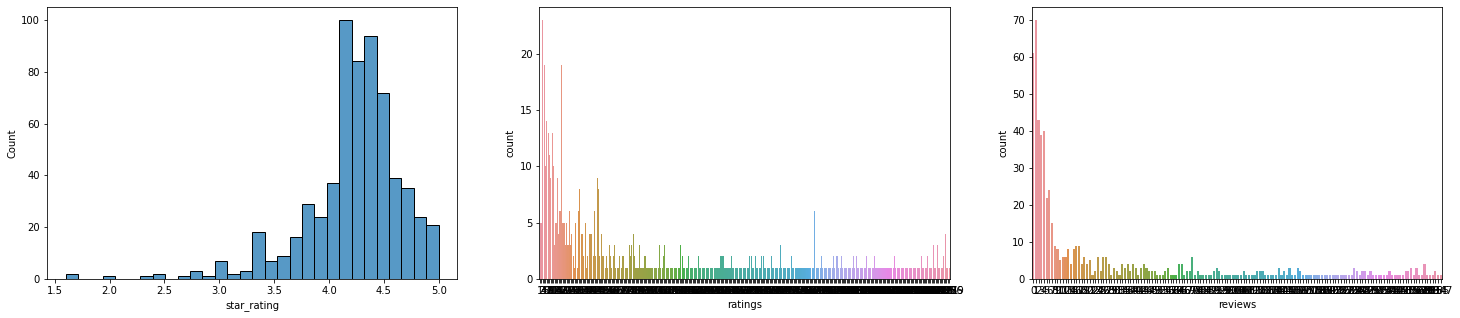

In [75]:
fig, ax = plt.subplots(1,3,figsize=(25,5))
ax0 = sns.histplot(data = data_no_zero_ratings, x = 'star_rating', ax = ax[0])
ax1 = sns.countplot(data = data_no_zero_ratings, x = 'ratings', ax = ax[1])
ax2 = sns.countplot(data = data_no_zero_ratings, x = 'reviews', ax = ax[2])
plt.show()

Lets zoom in the rating and reviews graphs to see that they are small numbers and no zeros

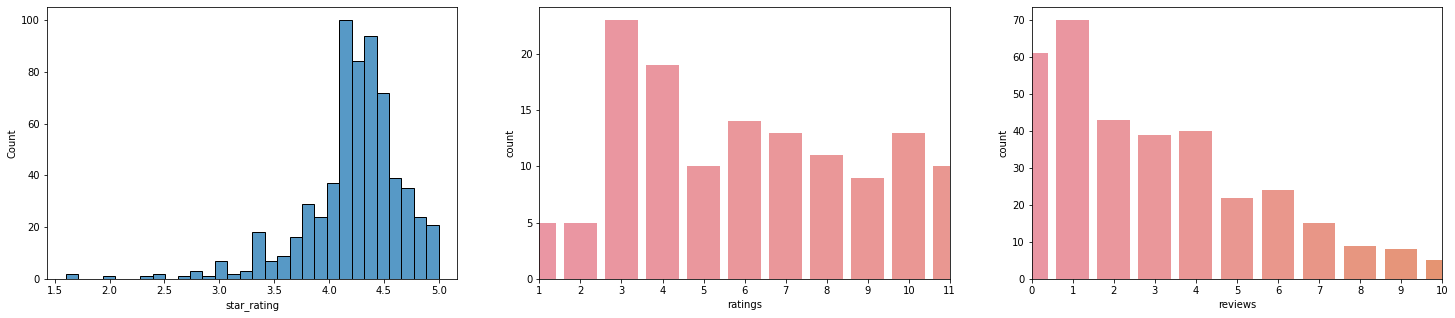

In [76]:
fig, ax = plt.subplots(1,3,figsize=(25,5))
ax0 = sns.histplot(data = data_no_zero_ratings, x = 'star_rating', ax = ax[0])
ax1 = sns.countplot(data = data_no_zero_ratings, x = 'ratings', ax = ax[1])
ax1.set(xlim=(0,10))
ax2 = sns.countplot(data = data_no_zero_ratings, x = 'reviews', ax = ax[2])
ax2.set(xlim=(0,10))
plt.show()

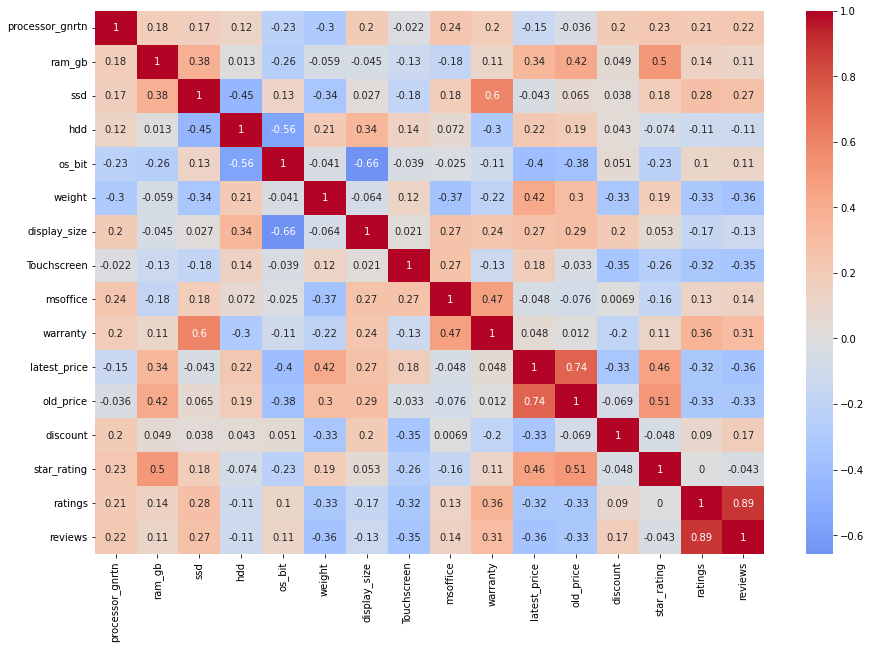

In [77]:
data_groupby_ram_type_no_zero = data_no_zero_ratings.groupby('brand')[numeric_features].mean()
corrs = data_groupby_ram_type_no_zero.corr(method = 'kendall')
plt.figure(figsize=(15,10))  
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

We will focus on the correlation between star ratings to the prices (before and after the discount)


<AxesSubplot:xlabel='star_rating', ylabel='old_price'>

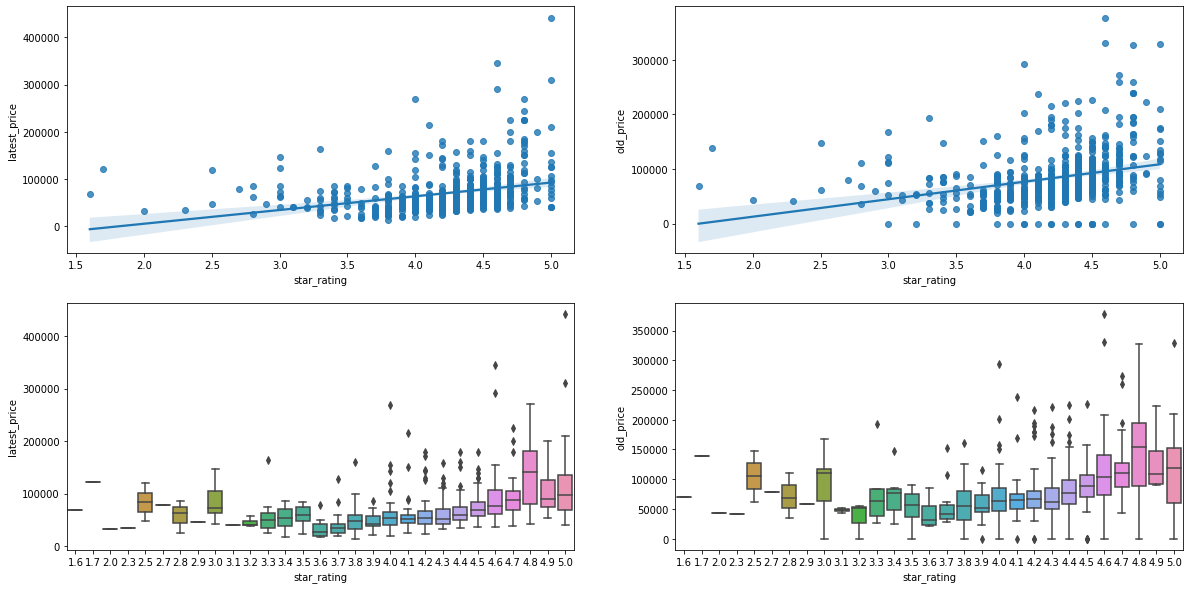

In [78]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.regplot(data = data_no_zero_ratings, x = 'star_rating', y ='latest_price', ax=ax[0,0]) 
sns.regplot(data = data_no_zero_ratings, x = 'star_rating', y ='old_price', ax=ax[0,1]) 
sns.boxplot(data = data_no_zero_ratings, x = 'star_rating', y ='latest_price', ax=ax[1,0]) 
sns.boxplot(data = data_no_zero_ratings, x = 'star_rating', y ='old_price', ax=ax[1,1]) 

In [79]:
data_no_zero_ratings[data_no_zero_ratings.star_rating <2.5]

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
10,ASUS,ExpertBook,Intel,Core i3,10.0,4,DDR4,0,1024,Windows,...,15.6,0,0,0,34649,41990,17,2.3,3,0
182,ASUS,VivoBook,Intel,Core i3,10.0,8,DDR4,0,1024,Windows,...,15.6,0,0,0,32990,43990,25,2.0,12,0
218,DELL,NaN,Intel,Core i5,10.0,8,LPDDR4,0,512,DOS,...,NaN,1,0,0,68090,69500,2,1.6,23,4
551,DELL,XPS,Intel,Core i7,8.0,16,DDR3,512,0,Windows,...,16.0,1,0,1,121890,139104,12,1.7,3,0


---

>#### Observation 4:
>
> We can see that most of the prices are getting along with the customers rates.
>
> We are suggesting 'Flipart.com' to continue with their price policy, and to observe the prices of the 4 laptops above.
>
---